In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [45]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'

In [46]:
files_E = glob.glob(f"{data_folder}\\EP\\combined_PE.parquet")
files_E

['C:\\Users\\david\\Documents\\@@ Python\\Jaar 5\\Q3\\ENVM1502\\Git\\ENVM1502-Catchment-model\\Data\\EP\\combined_PE.parquet']

In [47]:
evap = pd.read_parquet(files_E)
evap.index = pd.to_datetime(evap.index)
evap

,Pev
time,
2011-01-01,0.125836
2011-01-02,0.035201
2011-01-03,0.240013
2011-01-04,0.219147
2011-01-05,0.191367
...,...
1960-12-27,0.152401
1960-12-28,0.265924
1960-12-29,0.161177


In [48]:
files_P = glob.glob(f"{data_folder}\\P\\*.parquet")
files_P

prcp = pd.read_parquet(files_P[0])

In [49]:
files_Q = glob.glob(f"{data_folder}\\Q\\*1358000.parquet")
files_Q

discharge = pd.read_parquet(files_Q[0], columns=['Q_mm_d_hydro'])
discharge.index = pd.to_datetime(discharge.index)
discharge.rename(columns={'Q_mm_d_hydro':'Q'}, inplace=True)


In [50]:
df = pd.concat([evap,prcp, discharge], axis=1)


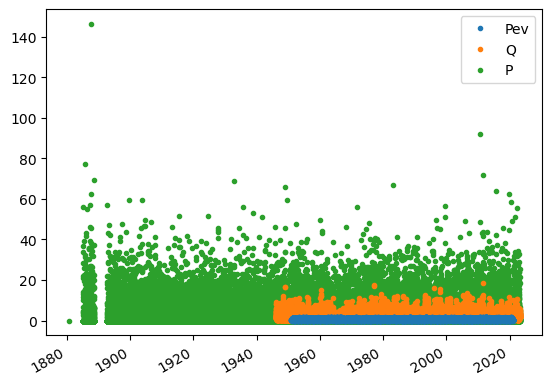

In [65]:
for i, col in enumerate(["Pev","Q","P"]):
    df[col].plot(lw=0,marker=".",zorder=2-i,label=col)
plt.legend()

In [52]:
df.to_parquet(f"{data_folder}\\combined_data.parquet")

<AxesSubplot: >

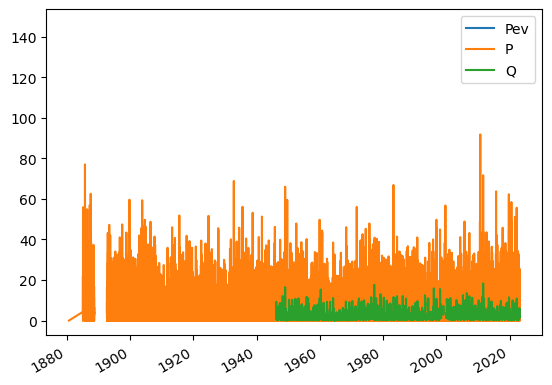

In [53]:
df.plot()